In [1]:
import pandas as pd
import numpy as np
import csv

## Count of MOBs by date

In [2]:
pytorch_times = {}
tf_times = {}

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if 'pytorch' in row['repo']:
            if row['report_time'] in pytorch_times:
                pytorch_times[row['report_time']] += 1
            else:
                pytorch_times[row['report_time']] = 1
        elif 'tensorflow' in row['repo']:
            if row['report_time'] in tf_times:
                tf_times[row['report_time']] += 1
            else:
                tf_times[row['report_time']] = 1

merged_list = []
for t in pytorch_times:
    merged_list.append({
        'time': t,
        'PyTorch': pytorch_times[t]
    })

for t in tf_times:
    merged_list.append({
        'time': t,
        'TensorFlow': tf_times[t]
    })

df = pd.DataFrame(merged_list)
df['time'] = pd.to_datetime(df['time'], format="%Y.%m.%d")
df.set_index('time', inplace=True)


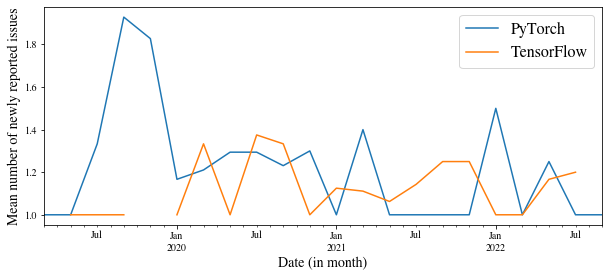

In [30]:
import matplotlib.pyplot

matplotlib.pyplot.rc('font', family='Times')


df_month = df.resample("2M").mean()
plt = df_month.plot(figsize=(10, 4))
plt.set_ylabel("Mean number of newly reported issues", fontdict={'family' : 'Times', 'size': 14})
plt.set_xlabel("Date (in month)", fontdict={'family' : 'Times', 'size': 14})
plt.legend(loc=1, fontsize=16)

plt.get_figure().savefig('mob_temporal_count.pdf', bbox_inches='tight')


## To clean up

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import csv

pytorch_days = []
tf_days = []

pytorch_dist = [0, 0, 0, 0, 0, 0]
tf_dist = [0, 0, 0, 0, 0, 0]

with open('valid_issues_labeled.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if 'pytorch' in row['repo']:
            repo = pytorch_dist
        elif 'tensorflow' in row['repo']:
            repo = tf_dist

        if row['find_duration'] == '':
            continue
        
        days = int(row['find_duration'])

        if days <= 7:
            repo[0] += 1
        elif days <= 30:
            repo[1] += 1
        elif days <= 90:
            repo[2] += 1
        elif days <= 180:
            repo[3] += 1
        elif days <= 365:
            repo[4] += 1
        else:
            repo[5] += 1

        # if 'pytorch' in row['repo']:
        #     if row['find_duration'] != '':
        #         days = int(row['find_duration'])
        #         pytorch_days.append(days)
        # elif 'tensorflow' in row['repo']:
        #     if row['find_duration'] != '':
        #         days = int(row['find_duration'])
        #         tf_days.append(days)

print(pytorch_dist)
print(tf_dist)

# plt.rcParams['font.family']='Helvetica Neue'
# fig, ax = plt.subplots()
# bins = [0, 14, 30, 60, 90, 180]
# ax.hist([pytorch_days, tf_days], bins=bins, density=True, histtype='bar', rwidth=0.8, label=['PyTorch', 'TensorFlow'])
# ax.legend()
# plt.show()
# fig.savefig("find_duration_hist.pdf", dpi=300)


[2, 4, 11, 16, 20, 7]
[0, 2, 4, 0, 3, 3]


In [3]:
import csv

pytorch_days = []
tf_days = []

pytorch_dist = [0, 0, 0, 0, 0, 0]
tf_dist = [0, 0, 0, 0, 0, 0]

with open('valid_issues_labeled.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if 'pytorch' in row['repo']:
            repo = pytorch_dist
        elif 'tensorflow' in row['repo']:
            repo = tf_dist

        if row['fix_duration'] == '':
            continue
        
        days = int(row['fix_duration'])

        if days <= 7:
            repo[0] += 1
        elif days <= 30:
            repo[1] += 1
        elif days <= 90:
            repo[2] += 1
        elif days <= 180:
            repo[3] += 1
        elif days <= 365:
            repo[4] += 1
        else:
            repo[5] += 1

print(pytorch_dist)
print(tf_dist)


[30, 17, 8, 8, 2, 1]
[2, 4, 5, 1, 1, 0]


In [6]:
import csv

symptoms = {}

with open('valid_issues.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        symptoms[row['url']] = row['symptom']

concated_rows = []
with open('valid_issues_labeled.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['url'] in symptoms:
            row['symptom'] = symptoms[row['url']]
        else:
            row['symptom'] = None
        concated_rows.append(row)

with open('valid_issues_labeled_with_symptoms.csv', 'w') as f:
    writer = csv.DictWriter(f, fieldnames=concated_rows[0].keys())
    writer.writeheader()
    writer.writerows(concated_rows)    

## Periods for detecting MOBs

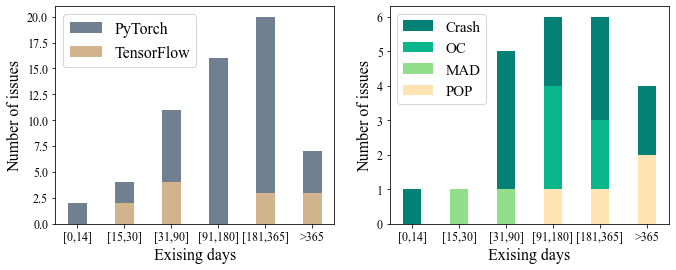

In [19]:
import csv
import matplotlib.pyplot as plt

days_crash = [0, 0, 0, 0, 0, 0]
days_oc = [0, 0, 0, 0, 0, 0]
days_mad = [0, 0, 0, 0, 0, 0]
days_pop = [0, 0, 0, 0, 0, 0]

pytorch_days = [0, 0, 0, 0, 0, 0]
tf_days = [0, 0, 0, 0, 0, 0]

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['find_duration'] == '':
            continue

        days = int(row['find_duration'])

        if days <= 7:
            day_index = 0
        elif days <= 30:
            day_index = 1
        elif days <= 90:
            day_index = 2
        elif days <= 180:
            day_index = 3
        elif days <= 365:
            day_index = 4
        else:
            day_index = 5

        if row['symptom'] == 'Crash':
            days_crash[day_index] += 1
        elif row['symptom'] == 'OC':
            days_oc[day_index] += 1
        elif row['symptom'] == 'MAD':
            days_mad[day_index] += 1
        elif row['symptom'] == 'POP':
            days_pop[day_index] += 1

        if 'pytorch' in row['repo']:
            repo = pytorch_days
        elif 'tensorflow' in row['repo']:
            repo = tf_days

        repo[day_index] += 1

name_list = ['[0,14]','[15,30]','[31,90]','[91,180]','[181,365]','>365']
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)

plt.xlabel("Exising days",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.bar(range(len(pytorch_days)),pytorch_days,tick_label=name_list,width=0.4,label='PyTorch',color='slategrey')
plt.bar(range(len(tf_days)),tf_days,tick_label=name_list,width=0.4,label='TensorFlow',color='tan')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16, loc=2)

plt.subplot(1,2,2)

plt.xlabel("Exising days",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.bar(range(len(days_crash)),days_crash,tick_label=name_list,width=0.4,label='Crash',color='#028174')
plt.bar(range(len(days_oc)),days_oc,tick_label=name_list,width=0.4,label='OC',color='#0ab68b')
plt.bar(range(len(days_mad)),days_mad,tick_label=name_list,width=0.4,label='MAD',color='#92de8b')
plt.bar(range(len(days_pop)),days_pop,tick_label=name_list,width=0.4,label='POP',color='#ffe3b3')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc=2)

# plt.show()
plt.savefig('duration_detect.pdf', format='pdf', bbox_inches='tight')

## Whether MOBs are fixed with patch

In [5]:
import csv

unresolved_count = 0
resolved_count = 0
patch_count = 0

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if 'not resolved' in row['note']:
            unresolved_count += 1
        if 'fixed' in row['note'] or 'resolved' in row['note']:
            resolved_count += 1
        if row['pr_url'] != '':
            patch_count += 1

print(unresolved_count)
print(resolved_count)
print(patch_count)

96
255
115


## Periods for fixing MOBs

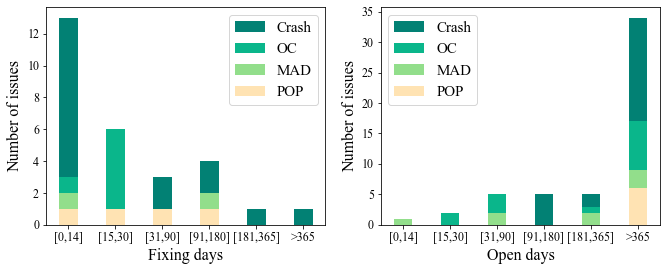

In [21]:
import csv
import matplotlib.pyplot as plt
from datetime import date, datetime

days_crash = [0, 0, 0, 0, 0, 0]
days_oc = [0, 0, 0, 0, 0, 0]
days_mad = [0, 0, 0, 0, 0, 0]
days_pop = [0, 0, 0, 0, 0, 0]

pytorch_days = [0, 0, 0, 0, 0, 0]
tf_days = [0, 0, 0, 0, 0, 0]

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['fix_duration'] == '':
            continue
        days = int(row['fix_duration'])

        if days <= 7:
            day_index = 0
        elif days <= 30:
            day_index = 1
        elif days <= 90:
            day_index = 2
        elif days <= 180:
            day_index = 3
        elif days <= 365:
            day_index = 4
        else:
            day_index = 5

        if row['symptom'] == 'Crash':
            days_crash[day_index] += 1
        elif row['symptom'] == 'OC':
            days_oc[day_index] += 1
        elif row['symptom'] == 'MAD':
            days_mad[day_index] += 1
        elif row['symptom'] == 'POP':
            days_pop[day_index] += 1

        if 'pytorch' in row['repo']:
            repo = pytorch_days
        elif 'tensorflow' in row['repo']:
            repo = tf_days

        repo[day_index] += 1

name_list = ['[0,14]','[15,30]','[31,90]','[91,180]','[181,365]','>365']
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)

plt.xlabel("Fixing days",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.bar(range(len(days_crash)),days_crash,tick_label=name_list,width=0.4,label='Crash',color='#028174')
plt.bar(range(len(days_oc)),days_oc,tick_label=name_list,width=0.4,label='OC',color='#0ab68b')
plt.bar(range(len(days_mad)),days_mad,tick_label=name_list,width=0.4,label='MAD',color='#92de8b')
plt.bar(range(len(days_pop)),days_pop,tick_label=name_list,width=0.4,label='POP',color='#ffe3b3')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc=1)

days_crash = [0, 0, 0, 0, 0, 0]
days_oc = [0, 0, 0, 0, 0, 0]
days_mad = [0, 0, 0, 0, 0, 0]
days_pop = [0, 0, 0, 0, 0, 0]

pytorch_days = [0, 0, 0, 0, 0, 0]
tf_days = [0, 0, 0, 0, 0, 0]

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['note'] != 'not resolved':
            continue

        report_time = row['report_time']
        if report_time == '':
            continue

        if row['symptom'] == 'N/A':
            continue

        report_time = datetime.strptime(report_time, "%Y.%m.%d")

        base_time = datetime.strptime('2022-08-01', "%Y-%m-%d")

        duration = base_time - report_time
        days = duration.days

        if days <= 7:
            day_index = 0
        elif days <= 30:
            day_index = 1
        elif days <= 90:
            day_index = 2
        elif days <= 180:
            day_index = 3
        elif days <= 365:
            day_index = 4
        else:
            day_index = 5

        if row['symptom'] == 'Crash':
            days_crash[day_index] += 1
        elif row['symptom'] == 'OC':
            days_oc[day_index] += 1
        elif row['symptom'] == 'MAD':
            days_mad[day_index] += 1
        elif row['symptom'] == 'POP':
            days_pop[day_index] += 1

        if 'pytorch' in row['repo']:
            repo = pytorch_days
        elif 'tensorflow' in row['repo']:
            repo = tf_days

        repo[day_index] += 1

plt.subplot(1,2,2)

plt.xlabel("Open days",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.bar(range(len(days_crash)),days_crash,tick_label=name_list,width=0.4,label='Crash',color='#028174')
plt.bar(range(len(days_oc)),days_oc,tick_label=name_list,width=0.4,label='OC',color='#0ab68b')
plt.bar(range(len(days_mad)),days_mad,tick_label=name_list,width=0.4,label='MAD',color='#92de8b')
plt.bar(range(len(days_pop)),days_pop,tick_label=name_list,width=0.4,label='POP',color='#ffe3b3')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc=2)

plt.savefig('duration_fix.pdf', format='pdf', bbox_inches='tight')

## Breakdown of root causes

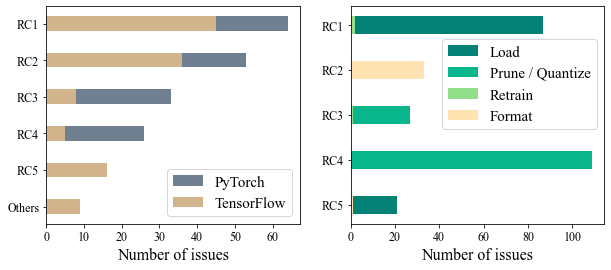

In [9]:
import matplotlib.pyplot as plt

rc1_count = [45, 64]
rc2_count = [36, 53]
rc3_count = [8, 33]
rc4_count = [5, 26]
rc5_count = [16, 6]
norc_count = [9, 3]

tf_count = [45, 36, 8, 5, 16, 9]
pytorch_count = [64, 53, 33, 26, 6, 3]

name_list = ['RC1','RC2','RC3','RC4','RC5','Others']
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

plt.xlabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.barh(range(len(pytorch_count)),pytorch_count,tick_label=name_list,height=0.4,label='PyTorch',color='slategrey')
plt.barh(range(len(tf_count)),tf_count,tick_label=name_list,height=0.4,label='TensorFlow',color='tan')
plt.gca().invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc=4)

plt.subplot(1,2,2)

rc1_count = [87, 0, 2, 0]
rc2_count = [5, 0, 2, 33]
rc3_count = [3, 27, 1, 0]
rc4_count = [0, 109, 0, 0]
rc5_count = [21, 0, 0, 1]


s1_count = [87, 5, 3, 0, 21]
s2_count = [0, 0, 27, 109, 0]
s3_count = [2, 2, 1, 0, 0]
s4_count = [0, 33, 0, 0, 1]

name_list = ['RC1','RC2','RC3','RC4','RC5']

plt.xlabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.barh(range(len(s1_count)),s1_count,tick_label=name_list,height=0.4,label='Load',color='#028174')
plt.barh(range(len(s2_count)),s2_count,tick_label=name_list,height=0.4,label='Prune / Quantize',color='#0ab68b')
plt.barh(range(len(s3_count)),s3_count,tick_label=name_list,height=0.4,label='Retrain',color='#92de8b')
plt.barh(range(len(s4_count)),s4_count,tick_label=name_list,height=0.4,label='Format',color='#ffe3b3')
plt.gca().invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, bbox_to_anchor=(0.33, 0.4))

plt.savefig('root_cause_breakdown.pdf', format='pdf', bbox_inches='tight')